# Advance Regression Assignment

by

### Remella Satya Ramana Kumar

**Importing the necessary libraries**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Importing Data**

In [6]:
data = pd.read_csv("S:train.csv",low_memory = False)

In [7]:
data.shape

(1460, 81)

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- Drop 'ID' column as it is not required for model buiding. 

In [12]:
data = data.drop(['Id'],axis=1)

### EDA Null Handling

In [13]:
#Finding percentage of null or missing values

c = data.isnull().sum()

# The above command (isnull()) function is used so that we can find out how many null rows in an column are present and sum() is to find the sum of it.

i = len(data.index)

# i is the number of rows in the data

null_data = round(100*(c/i), 3)

#Printing columns which have more than 0% missing values

null_data[ null_data > 0 ]

LotFrontage     17.740
Alley           93.767
MasVnrType       0.548
MasVnrArea       0.548
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Electrical       0.068
FireplaceQu     47.260
GarageType       5.548
GarageYrBlt      5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
PoolQC          99.521
Fence           80.753
MiscFeature     96.301
dtype: float64

In [14]:
# drop() is used to drop the data 
data.drop(null_data[ null_data > 40 ].index, axis=1, inplace=True)

In [15]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [16]:
data.shape

(1460, 75)

In [17]:
#Finding percentage of null or missing values

c = data.isnull().sum()

# The above command (isnull()) function is used so that we can find out how many null rows in an column are present and sum() is to find the sum of it.

i = len(data.index)

# i is the number of rows in the data

null_data = round(100*(c/i), 3)

#Printing columns which have more than 0% missing values

null_data[ null_data > 0 ]

LotFrontage     17.740
MasVnrType       0.548
MasVnrArea       0.548
BsmtQual         2.534
BsmtCond         2.534
BsmtExposure     2.603
BsmtFinType1     2.534
BsmtFinType2     2.603
Electrical       0.068
GarageType       5.548
GarageYrBlt      5.548
GarageFinish     5.548
GarageQual       5.548
GarageCond       5.548
dtype: float64

In [18]:
for col in data:
    print(col + " Count")
    print(data[col].value_counts() , "\n\n")

MSSubClass Count
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 


MSZoning Count
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 


LotFrontage Count
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 


LotArea Count
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 


Street Count
Pave    1454
Grvl       6
Name: Street, dtype: int64 


LotShape Count
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 


LandContour Count
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [19]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


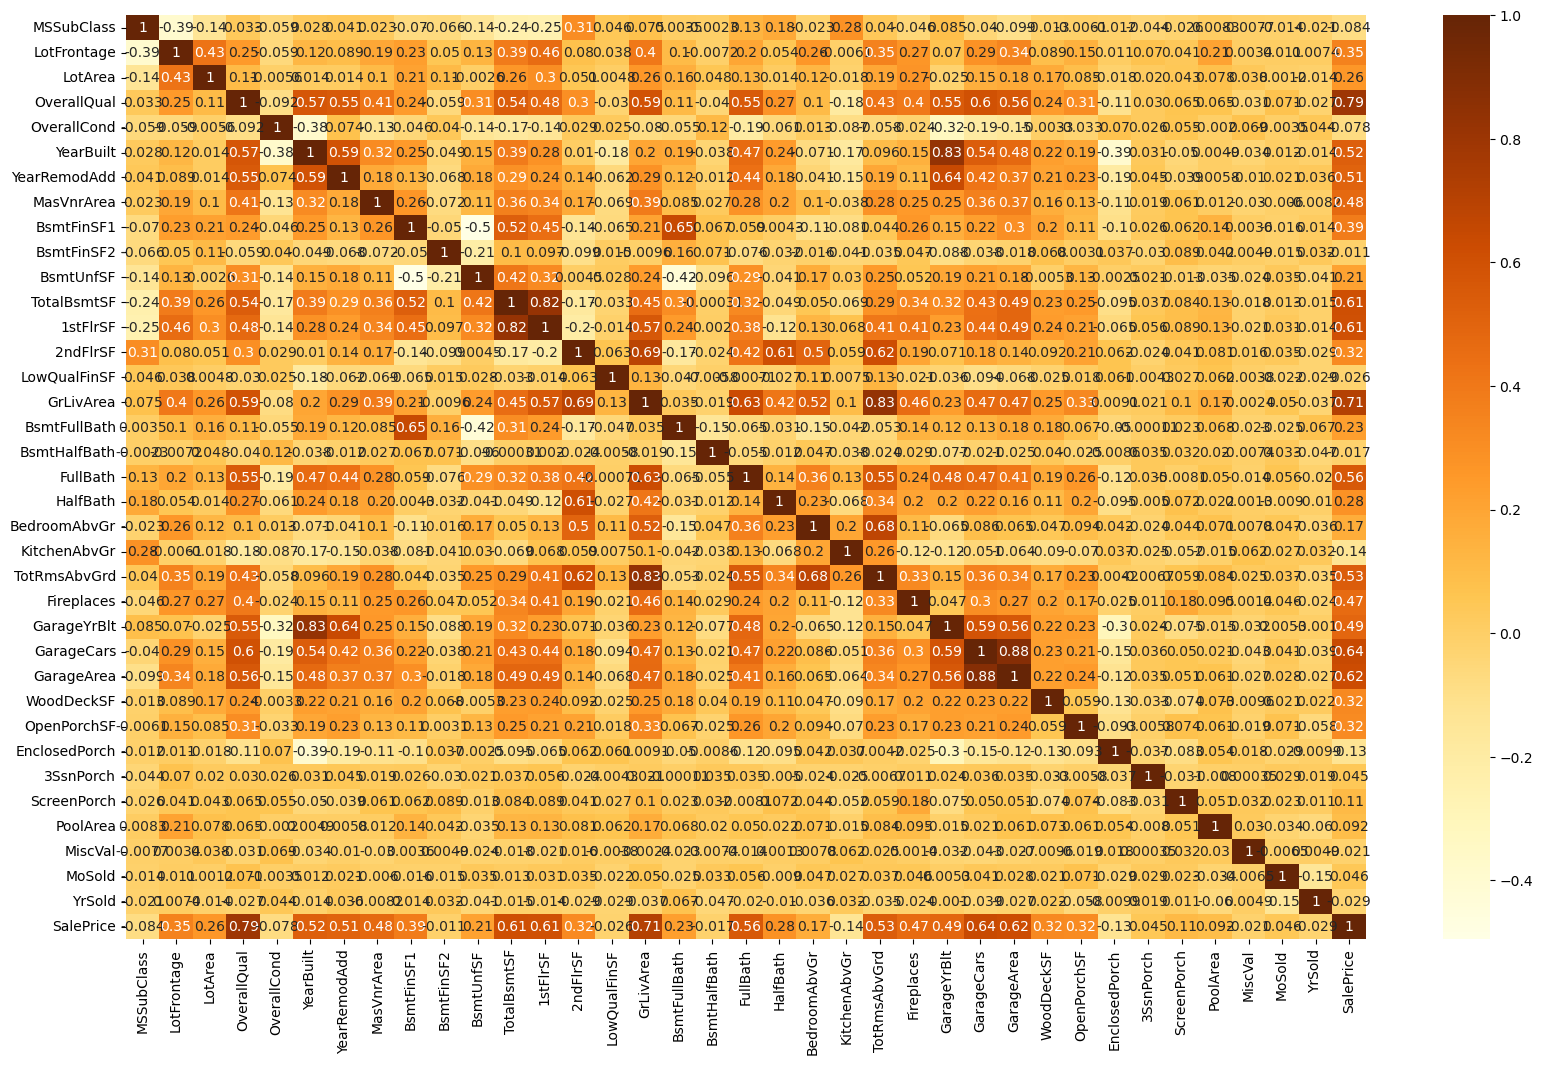

In [20]:
c= data.corr()
plt.figure(figsize=[20,12])
sns.heatmap(c,cmap = 'YlOrBr',annot=True)
plt.show()

In [21]:
data.LotFrontage = data.LotFrontage.fillna(data.LotFrontage.median())
data.MasVnrArea = data.MasVnrArea.fillna(data.MasVnrArea.median()) 
data.MasVnrType = data.MasVnrType.fillna('None')
data.BsmtQual = data.BsmtQual.fillna('NA')
data.BsmtCond = data.BsmtCond.fillna('NA')
data.BsmtExposure = data.BsmtExposure.fillna('No')
data.BsmtFinType1 = data.BsmtFinType1.fillna('NA')
data.BsmtFinType2 = data.BsmtFinType2.fillna('NA')
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])
data.GarageType = data.GarageType.fillna('NA')
data.GarageYrBlt = data.GarageYrBlt.fillna(0)
data.GarageFinish = data.GarageFinish.fillna('NA')
data.GarageQual = data.GarageQual.fillna('NA')
data.GarageQual = data.GarageQual.fillna('NA')
data.GarageCond = data.GarageCond.fillna('NA')

In [22]:
#Finding percentage of null or missing values

c = data.isnull().sum()

# The above command (isnull()) function is used so that we can find out how many null rows in an column are present and sum() is to find the sum of it.

i = len(data.index)

# i is the number of rows in the data

null_data = round(100*(c/i), 3)

#Printing columns which have more than 0% missing values

null_data[ null_data > 0 ]

Series([], dtype: float64)

**Bifurcating Continous Variables**

In [23]:
data = data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data = data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data = data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
data = data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
data = data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data = data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
data = data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [24]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**House Age is an important aspect to house sale**

In [25]:
data['HouseAge'] = data.YrSold - data.YearBuilt

### Unwanted column removal

- 'Heating' is not required in Australia as there are no extreme weathers.
- 'CentralAir' is also not required for the same reason.
- 'YrSold','YearBuilt' can also be neglected as HouseAge calculated.
- 'Street' canbe neglected.
- Somemore columns are removedd that are not required according to Australian conditions.

In [26]:
data=data.drop(columns=['YrSold','YearBuilt','Street', 'LandContour', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2'])
                          

In [27]:
data.shape

(1460, 58)

In [28]:
c= data.corr()

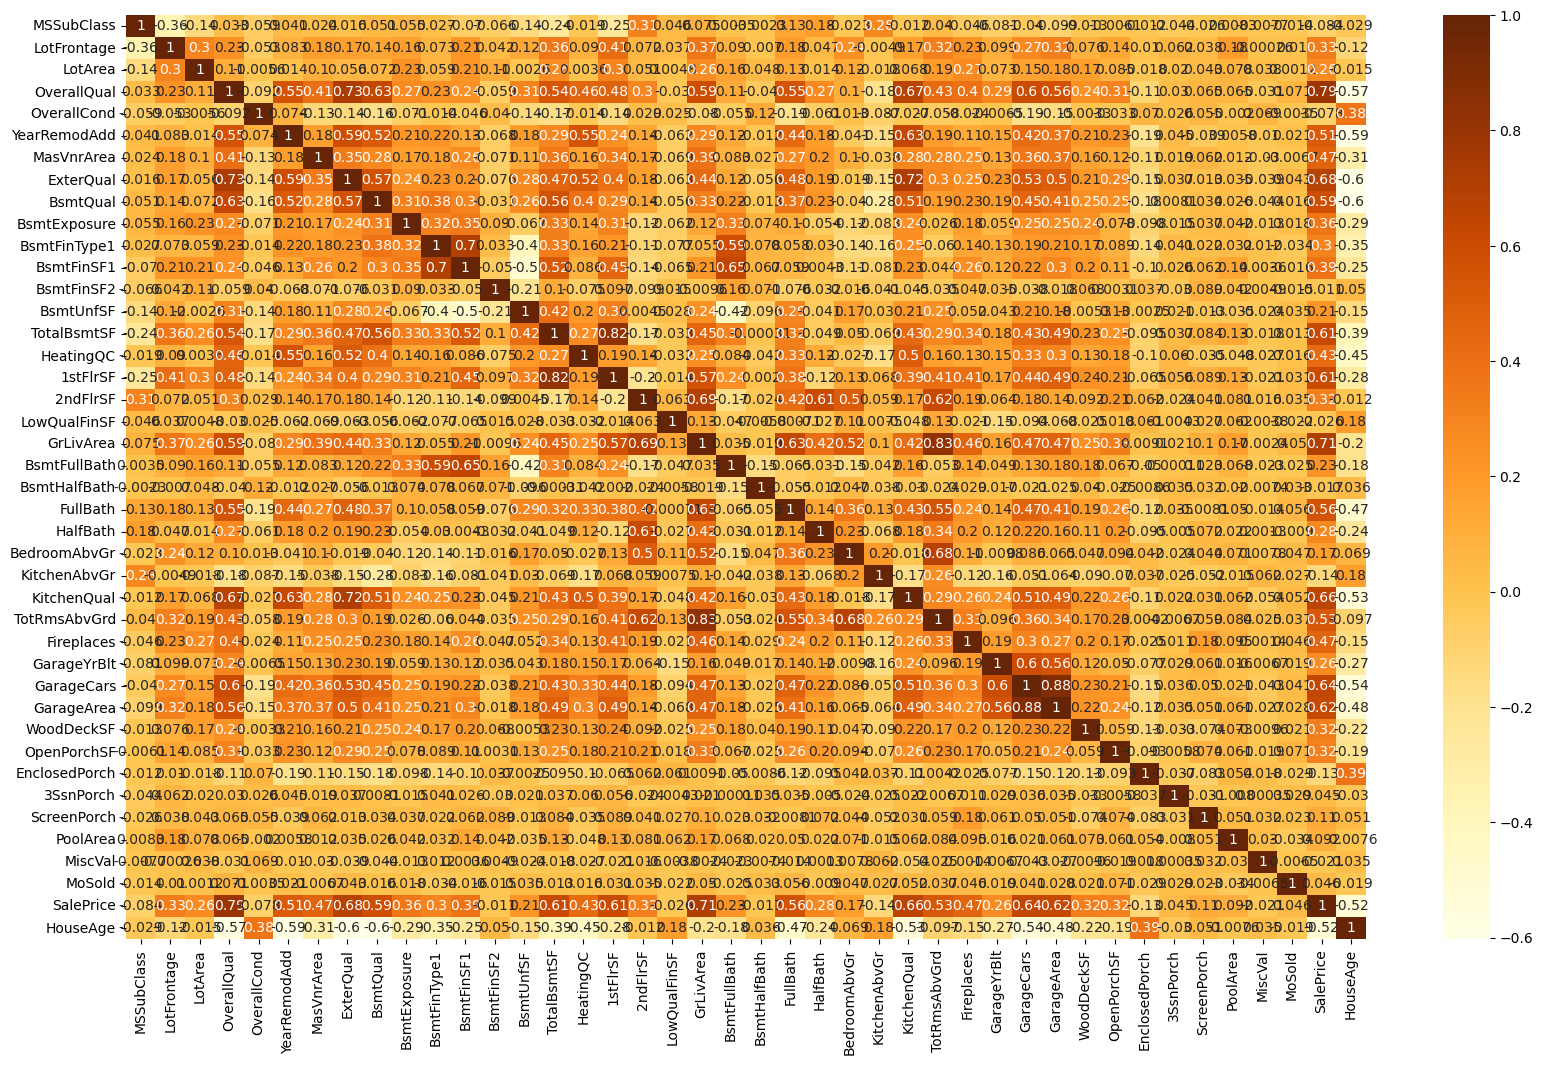

In [29]:
c= data.corr()
plt.figure(figsize=[20,12])
sns.heatmap(c,cmap = 'YlOrBr',annot=True)
plt.show()

- Convert **'MSSubClass'** to Object

In [30]:
convert_dict = {'MSSubClass':object}
data = data.astype(convert_dict)

### Getting the continous variables in the data

In [31]:
object_columns = []
for c in data.columns:
    if data[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


### Getting Dummies for continous variables

In [32]:
data = pd.get_dummies(data = data , columns = ['MSSubClass', 'MSZoning', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],drop_first=True)

In [33]:
data.shape

(1460, 166)

In [34]:
data.axes

[RangeIndex(start=0, stop=1460, step=1),
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
        'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
        ...
        'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
        'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
        'SaleCondition_Family', 'SaleCondition_Normal',
        'SaleCondition_Partial'],
       dtype='object', length=166)]

## Numeric variables for  scaling

In [35]:
numeric_vars = data.select_dtypes(include=["int64"])

In [36]:
print(numeric_vars)

      LotArea  OverallQual  OverallCond  YearRemodAdd  ExterQual  BsmtQual  \
0        8450            7            5          2003          4         4   
1        9600            6            8          1976          3         4   
2       11250            7            5          2002          4         4   
3        9550            7            5          1970          3         3   
4       14260            8            5          2000          4         4   
...       ...          ...          ...           ...        ...       ...   
1455     7917            6            5          2000          3         4   
1456    13175            6            6          1988          3         4   
1457     9042            7            9          2006          5         3   
1458     9717            5            6          1996          3         3   
1459     9937            5            6          1965          4         3   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  ...  

#### These are the numeric variables and these variables can be scaled

In [37]:
numeric_vars.axes

[RangeIndex(start=0, stop=1460, step=1),
 Index(['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual',
        'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'SalePrice', 'HouseAge'],
       dtype='object')]

# Regression data preparation

### Data into Training and Testing Sets

In [38]:
Train_dataset,Test_dataset = train_test_split(data,train_size=0.70,random_state=100)

In [39]:
Train_dataset.shape

(1021, 166)

In [40]:
Test_dataset.shape

(439, 166)

### Target Variables

In [41]:
y_train = Train_dataset.pop('SalePrice')

**Assign data**

In [42]:
X_train = Train_dataset

In [43]:
#instantiate the object
scaler = StandardScaler()

numeric_vars = ['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'ExterQual',
        'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'HouseAge']

#fit on data
Train_dataset[numeric_vars] = scaler.fit_transform(Train_dataset[numeric_vars])
Train_dataset.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,90.0,-0.057261,0.648310,-0.532073,0.389207,256.0,1.051361,0.577925,2.181065,1.138412,...,0,0,0,0,1,0,0,0,1,0
239,52.0,-0.169753,-0.066511,-1.448170,-1.698692,0.0,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,1,0,0,0,1,0
986,59.0,-0.502762,-0.066511,2.216221,0.874765,0.0,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,1,0,0,0,1,0
1416,60.0,0.082504,-1.496155,0.384025,-1.698692,0.0,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,1,0,0,0,1,0
390,50.0,-0.202365,-0.781333,2.216221,-1.698692,0.0,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,1,0,0,0,1,0


In [44]:
print(y_train)

318     260000
239     113000
986     117000
1416    122500
390     119000
         ...  
802     189000
53      385000
350     318061
79      110000
792     269790
Name: SalePrice, Length: 1021, dtype: int64


## Linear Regression

- Linear regression is one of the easiest and most popular Machine Learning algorithms.It is a statistical method that is used for predictive analysis.

### RFE

- Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [45]:
# 35 RFE variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 125),
 ('LotArea', False, 26),
 ('OverallQual', True, 1),
 ('OverallCond', False, 33),
 ('YearRemodAdd', False, 124),
 ('MasVnrArea', False, 129),
 ('ExterQual', False, 43),
 ('BsmtQual', False, 24),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 14),
 ('BsmtFinSF1', False, 100),
 ('BsmtFinSF2', False, 122),
 ('BsmtUnfSF', False, 116),
 ('TotalBsmtSF', False, 127),
 ('HeatingQC', False, 119),
 ('1stFlrSF', False, 99),
 ('2ndFlrSF', False, 7),
 ('LowQualFinSF', False, 126),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 57),
 ('FullBath', False, 50),
 ('HalfBath', False, 54),
 ('BedroomAbvGr', False, 59),
 ('KitchenAbvGr', False, 107),
 ('KitchenQual', False, 15),
 ('TotRmsAbvGrd', False, 112),
 ('Fireplaces', False, 53),
 ('GarageYrBlt', False, 128),
 ('GarageCars', False, 12),
 ('GarageArea', False, 92),
 ('WoodDeckSF', False, 66),
 ('OpenPorchSF', False, 118),
 ('EnclosedPorch', False, 103),
 ('3SsnPorch', False, 63),
 ('

In [47]:
X_Rfe = X_train.columns[rfe.support_]

In [48]:
X_Rfe_Backup = X_Rfe 

In [49]:
X_Rfe_Backup.shape

(35,)

In [50]:
X_Rfe.shape

(35,)

### Columns Selected for RFE

In [51]:
print(X_Rfe)

Index(['OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_45',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'SaleType_Con'],
      dtype='object')


### Columns that are not selected by RFE

In [52]:
 X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=130)

### VIF 

- Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

In [53]:
X_Rfe = X_train[X_Rfe]

In [54]:
X_Rfe  = sm.add_constant(X_Rfe)

In [55]:
lm = sm.OLS(y_train,X_Rfe).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:01   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     985   BIC:                         2.438e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.297e+05    1.3e+04      9.981      0.000    1.04e+05    1.55e+05
OverallQual           2.598e+04   1719.904     15.107      0.000    2.26e+04    2.94e+04
BsmtExposure           1.36e+04   1139.630     11.936      0.000    1.14e+04    1.58e+04
GrLivArea             3.388e+04   1660.137     20.409      0.000    3.06e+04    3.71e+04
MSSubClass_45        -1.031e+04    2.6e+04     -0.396      0.692   -6.13e+04    4.07e+04
MSSubClass_90        -2.779e+04   5529.767     -5.026      0.000   -3.86e+04   -1.69e+04
MSSubClass_120       -1.921e+04   4914.545     -3.909      0.000   -2.89e+04   -9566.910
MSSubClass_160       -2.469e+04   6087.029     -4.057      0.000   -3.66e+04   -1.27e+04
MSSubClass_190       -2.025e+04   7111.784     -2.847      0.005   -3.42e+04   -6292.114
MSZoning_FV           2.955e+04   1.65e+04      1.788      0.074   -2883.131     6.2e+04
MSZoning_RH           3.124e+04    1.6e+04      1.958      0.051     -72.105    6.25e+04
MSZoning_RL           3.983e+04    1.3e+04      3.064      0.002    1.43e+04    6.53e+04
MSZoning_RM           2.845e+04   1.31e+04      2.165      0.031    2661.347    5.42e+04
LotShape_IR3         -2.133e+04   1.14e+04     -1.877      0.061   -4.36e+04     973.721
LotConfig_FR3        -1.763e+04   1.95e+04     -0.903      0.367    -5.6e+04    2.07e+04
Neighborhood_Crawfor  2.701e+04   6233.666      4.333      0.000    1.48e+04    3.92e+04
Neighborhood_Edwards -1.473e+04   4218.061     -3.491      0.001    -2.3e+04   -6447.703
Neighborhood_NoRidge  6.377e+04   6496.347      9.816      0.000     5.1e+04    7.65e+04
Neighborhood_NridgHt  6.192e+04   5250.571     11.793      0.000    5.16e+04    7.22e+04
Neighborhood_Somerst  3.868e+04   9043.719      4.277      0.000    2.09e+04    5.64e+04
Neighborhood_StoneBr  3.658e+04      1e+04      3.642      0.000    1.69e+04    5.63e+04
Neighborhood_Veenker  2.927e+04   1.06e+04      2.763      0.006    8483.678    5.01e+04
HouseStyle_1.5Unf     1.211e+04    2.4e+04      0.505      0.614    -3.5e+04    5.92e+04
HouseStyle_1Story     2.014e+04   2608.237      7.721      0.000     1.5e+04    2.53e+04
HouseStyle_2.5Fin     -4.16e+04   1.75e+04     -2.380      0.018   -7.59e+04   -7298.971
HouseStyle_2.5Unf    -2.238e+04   1.23e+04     -1.825      0.068   -4.64e+04    1688.817
Exterior1st_BrkComm  -5.128e+04   3.14e+04     -1.634      0.103   -1.13e+05    1.03e+04
Exterior1st_BrkFace   1.288e+04   6416.542      2.007      0.045     283.569    2.55e+04
Exterior1st_CemntBd  -2.523e+04   2.39e+04     -1.058      0.290    -7.2e+04    2.16e+04
Exterior1st_ImStucc  -4.757e+04   3.62e+04     -1.313      0.190   -1.19e+05    2.35e+04
Exterior2nd_Brk Cmn   2.113e+04   2.02e+04      1.046      0.296   -1.85e+04    6.08e+04
Exterior2nd_CmentBd   3.539e+04   2.39e+04      1.481    

In [57]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_Rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Rfe.values, i) for i in range(X_Rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,154.983
11,MSZoning_RL,26.142
12,MSZoning_RM,20.311
31,Exterior2nd_CmentBd,18.311
28,Exterior1st_CemntBd,18.250
9,MSZoning_FV,10.563
22,HouseStyle_1.5Unf,6.645
4,MSSubClass_45,6.619
19,Neighborhood_Somerst,4.154
10,MSZoning_RH,2.938


**Column 'HouseStyle_1.5Unf' is elimainated as P is 0.614**

## Remove columns that have p > 0.05 and start building the model

In [58]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['HouseStyle_1.5Unf'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:01   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     986   BIC:                         2.437e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.297e+05    1.3e+04      9.984      0.000    1.04e+05    1.55e+05
OverallQual           2.602e+04   1717.357     15.153      0.000    2.27e+04    2.94e+04
BsmtExposure          1.358e+04   1138.070     11.930      0.000    1.13e+04    1.58e+04
GrLivArea             3.381e+04   1652.861     20.453      0.000    3.06e+04     3.7e+04
MSSubClass_45         1698.9344   1.05e+04      0.162      0.872   -1.89e+04    2.23e+04
MSSubClass_90        -2.775e+04   5526.895     -5.020      0.000   -3.86e+04   -1.69e+04
MSSubClass_120        -1.92e+04   4912.668     -3.909      0.000   -2.88e+04   -9563.720
MSSubClass_160       -2.474e+04   6083.870     -4.067      0.000   -3.67e+04   -1.28e+04
MSSubClass_190       -1.972e+04   7031.899     -2.804      0.005   -3.35e+04   -5921.326
MSZoning_FV           2.959e+04   1.65e+04      1.791      0.074   -2828.436     6.2e+04
MSZoning_RH           3.122e+04   1.59e+04      1.958      0.051     -77.567    6.25e+04
MSZoning_RL           3.993e+04    1.3e+04      3.073      0.002    1.44e+04    6.54e+04
MSZoning_RM           2.845e+04   1.31e+04      2.165      0.031    2665.649    5.42e+04
LotShape_IR3         -2.127e+04   1.14e+04     -1.872      0.061   -4.36e+04    1024.003
LotConfig_FR3         -1.76e+04   1.95e+04     -0.902      0.367   -5.59e+04    2.07e+04
Neighborhood_Crawfor  2.698e+04   6231.079      4.330      0.000    1.48e+04    3.92e+04
Neighborhood_Edwards -1.475e+04   4216.076     -3.499      0.000    -2.3e+04   -6480.555
Neighborhood_NoRidge  6.379e+04   6493.632      9.824      0.000    5.11e+04    7.65e+04
Neighborhood_NridgHt  6.191e+04   5248.547     11.796      0.000    5.16e+04    7.22e+04
Neighborhood_Somerst  3.865e+04   9040.191      4.276      0.000    2.09e+04    5.64e+04
Neighborhood_StoneBr  3.655e+04      1e+04      3.640      0.000    1.68e+04    5.63e+04
Neighborhood_Veenker  2.927e+04   1.06e+04      2.764      0.006    8490.582       5e+04
HouseStyle_1Story     2.004e+04   2599.809      7.707      0.000    1.49e+04    2.51e+04
HouseStyle_2.5Fin    -4.158e+04   1.75e+04     -2.379      0.018   -7.59e+04   -7287.471
HouseStyle_2.5Unf    -2.241e+04   1.23e+04     -1.828      0.068   -4.65e+04    1646.215
Exterior1st_BrkComm  -5.119e+04   3.14e+04     -1.632      0.103   -1.13e+05    1.04e+04
Exterior1st_BrkFace    1.29e+04   6413.981      2.011      0.045     309.665    2.55e+04
Exterior1st_CemntBd  -2.523e+04   2.38e+04     -1.058      0.290    -7.2e+04    2.16e+04
Exterior1st_ImStucc  -4.765e+04   3.62e+04     -1.315      0.189   -1.19e+05    2.34e+04
Exterior2nd_Brk Cmn   2.108e+04   2.02e+04      1.044      0.297   -1.85e+04    6.07e+04
Exterior2nd_CmentBd   3.543e+04   2.39e+04      1.483      0.138   -1.14e+04    8.23e+04
Exterior2nd_ImStucc   2.289e+04   1.28e+04      1.789    

In [59]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['SaleType_Con'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:01   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     987   BIC:                         2.436e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.297e+05    1.3e+04      9.990      0.000    1.04e+05    1.55e+05
OverallQual           2.603e+04   1716.734     15.163      0.000    2.27e+04    2.94e+04
BsmtExposure           1.36e+04   1137.178     11.957      0.000    1.14e+04    1.58e+04
GrLivArea              3.38e+04   1652.234     20.456      0.000    3.06e+04     3.7e+04
MSSubClass_45         1684.6175   1.05e+04      0.160      0.873   -1.89e+04    2.23e+04
MSSubClass_90        -2.775e+04   5525.011     -5.023      0.000   -3.86e+04   -1.69e+04
MSSubClass_120       -1.903e+04   4901.882     -3.883      0.000   -2.87e+04   -9412.846
MSSubClass_160        -2.49e+04   6075.746     -4.098      0.000   -3.68e+04    -1.3e+04
MSSubClass_190       -1.972e+04   7029.512     -2.806      0.005   -3.35e+04   -5928.794
MSZoning_FV           2.991e+04   1.65e+04      1.813      0.070   -2471.067    6.23e+04
MSZoning_RH           3.119e+04   1.59e+04      1.957      0.051     -92.114    6.25e+04
MSZoning_RL           3.991e+04    1.3e+04      3.072      0.002    1.44e+04    6.54e+04
MSZoning_RM           2.844e+04   1.31e+04      2.166      0.031    2671.542    5.42e+04
LotShape_IR3         -2.131e+04   1.14e+04     -1.876      0.061   -4.36e+04     979.219
LotConfig_FR3        -1.774e+04   1.95e+04     -0.909      0.364    -5.6e+04    2.06e+04
Neighborhood_Crawfor  2.694e+04   6228.661      4.326      0.000    1.47e+04    3.92e+04
Neighborhood_Edwards -1.473e+04   4214.397     -3.495      0.000    -2.3e+04   -6457.512
Neighborhood_NoRidge  6.378e+04   6491.394      9.826      0.000     5.1e+04    7.65e+04
Neighborhood_NridgHt  6.189e+04   5246.604     11.796      0.000    5.16e+04    7.22e+04
Neighborhood_Somerst  3.869e+04   9036.972      4.281      0.000     2.1e+04    5.64e+04
Neighborhood_StoneBr  3.648e+04      1e+04      3.634      0.000    1.68e+04    5.62e+04
Neighborhood_Veenker  3.041e+04   1.04e+04      2.924      0.004    9999.787    5.08e+04
HouseStyle_1Story     1.998e+04   2597.257      7.694      0.000    1.49e+04    2.51e+04
HouseStyle_2.5Fin    -4.153e+04   1.75e+04     -2.378      0.018   -7.58e+04   -7257.328
HouseStyle_2.5Unf    -2.242e+04   1.23e+04     -1.829      0.068   -4.65e+04    1633.380
Exterior1st_BrkComm  -5.132e+04   3.14e+04     -1.636      0.102   -1.13e+05    1.02e+04
Exterior1st_BrkFace   1.327e+04   6378.173      2.081      0.038     757.167    2.58e+04
Exterior1st_CemntBd  -2.522e+04   2.38e+04     -1.058      0.290    -7.2e+04    2.16e+04
Exterior1st_ImStucc  -4.758e+04   3.62e+04     -1.314      0.189   -1.19e+05    2.35e+04
Exterior2nd_Brk Cmn   2.123e+04   2.02e+04      1.052      0.293   -1.84e+04    6.08e+04
Exterior2nd_CmentBd   3.538e+04   2.39e+04      1.481      0.139   -1.15e+04    8.22e+04
Exterior2nd_ImStucc   2.288e+04   1.28e+04      1.789    

In [60]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['LotConfig_FR3'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:01   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     988   BIC:                         2.436e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.297e+05    1.3e+04      9.990      0.000    1.04e+05    1.55e+05
OverallQual           2.605e+04   1716.398     15.179      0.000    2.27e+04    2.94e+04
BsmtExposure          1.357e+04   1136.621     11.937      0.000    1.13e+04    1.58e+04
GrLivArea              3.38e+04   1652.088     20.458      0.000    3.06e+04     3.7e+04
MSSubClass_45         1810.1879   1.05e+04      0.172      0.863   -1.88e+04    2.24e+04
MSSubClass_90        -2.773e+04   5524.457     -5.019      0.000   -3.86e+04   -1.69e+04
MSSubClass_120       -1.921e+04   4897.461     -3.923      0.000   -2.88e+04   -9601.331
MSSubClass_160       -2.509e+04   6071.672     -4.132      0.000    -3.7e+04   -1.32e+04
MSSubClass_190       -1.963e+04   7028.204     -2.794      0.005   -3.34e+04   -5841.765
MSZoning_FV           2.966e+04   1.65e+04      1.798      0.073   -2720.048     6.2e+04
MSZoning_RH            3.12e+04   1.59e+04      1.957      0.051     -87.081    6.25e+04
MSZoning_RL           3.993e+04    1.3e+04      3.074      0.002    1.44e+04    6.54e+04
MSZoning_RM           2.821e+04   1.31e+04      2.149      0.032    2449.026     5.4e+04
LotShape_IR3          -2.13e+04   1.14e+04     -1.876      0.061   -4.36e+04     981.966
Neighborhood_Crawfor  2.691e+04   6227.968      4.320      0.000    1.47e+04    3.91e+04
Neighborhood_Edwards -1.473e+04   4214.027     -3.494      0.000    -2.3e+04   -6456.261
Neighborhood_NoRidge  6.374e+04   6490.632      9.820      0.000     5.1e+04    7.65e+04
Neighborhood_NridgHt  6.158e+04   5235.093     11.763      0.000    5.13e+04    7.19e+04
Neighborhood_Somerst  3.859e+04   9035.572      4.271      0.000    2.09e+04    5.63e+04
Neighborhood_StoneBr   3.65e+04      1e+04      3.637      0.000    1.68e+04    5.62e+04
Neighborhood_Veenker  3.044e+04   1.04e+04      2.927      0.003       1e+04    5.08e+04
HouseStyle_1Story     2.001e+04   2596.875      7.705      0.000    1.49e+04    2.51e+04
HouseStyle_2.5Fin    -4.156e+04   1.75e+04     -2.380      0.018   -7.58e+04   -7288.908
HouseStyle_2.5Unf    -2.228e+04   1.23e+04     -1.818      0.069   -4.63e+04    1763.814
Exterior1st_BrkComm   -5.15e+04   3.14e+04     -1.642      0.101   -1.13e+05       1e+04
Exterior1st_BrkFace   1.327e+04   6377.612      2.081      0.038     755.286    2.58e+04
Exterior1st_CemntBd  -2.512e+04   2.38e+04     -1.054      0.292   -7.19e+04    2.17e+04
Exterior1st_ImStucc  -4.772e+04   3.62e+04     -1.318      0.188   -1.19e+05    2.33e+04
Exterior2nd_Brk Cmn   2.139e+04   2.02e+04      1.060      0.289   -1.82e+04     6.1e+04
Exterior2nd_CmentBd   3.549e+04   2.39e+04      1.486      0.137   -1.14e+04    8.23e+04
Exterior2nd_ImStucc   2.298e+04   1.28e+04      1.796      0.073   -2123.013    4.81e+04
Exterior2nd_Stucco   -2.888e+04   7824.469     -3.691    

In [61]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['MSSubClass_45'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     153.7
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:01   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     989   BIC:                         2.435e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.297e+05    1.3e+04     10.002      0.000    1.04e+05    1.55e+05
OverallQual           2.608e+04   1709.268     15.257      0.000    2.27e+04    2.94e+04
BsmtExposure          1.356e+04   1134.939     11.947      0.000    1.13e+04    1.58e+04
GrLivArea             3.375e+04   1621.375     20.813      0.000    3.06e+04    3.69e+04
MSSubClass_90        -2.772e+04   5521.551     -5.020      0.000   -3.86e+04   -1.69e+04
MSSubClass_120       -1.925e+04   4889.983     -3.937      0.000   -2.88e+04   -9654.407
MSSubClass_160       -2.518e+04   6043.731     -4.167      0.000    -3.7e+04   -1.33e+04
MSSubClass_190       -1.967e+04   7022.376     -2.800      0.005   -3.34e+04   -5884.713
MSZoning_FV           2.965e+04   1.65e+04      1.798      0.073   -2715.491     6.2e+04
MSZoning_RH           3.133e+04   1.59e+04      1.968      0.049      96.464    6.26e+04
MSZoning_RL           3.993e+04    1.3e+04      3.076      0.002    1.45e+04    6.54e+04
MSZoning_RM           2.826e+04   1.31e+04      2.154      0.031    2519.373     5.4e+04
LotShape_IR3         -2.127e+04   1.13e+04     -1.874      0.061   -4.35e+04    1004.567
Neighborhood_Crawfor  2.697e+04   6215.507      4.338      0.000    1.48e+04    3.92e+04
Neighborhood_Edwards -1.473e+04   4211.881     -3.497      0.000    -2.3e+04   -6464.886
Neighborhood_NoRidge  6.377e+04   6484.534      9.834      0.000     5.1e+04    7.65e+04
Neighborhood_NridgHt   6.16e+04   5231.159     11.775      0.000    5.13e+04    7.19e+04
Neighborhood_Somerst  3.859e+04   9031.110      4.273      0.000    2.09e+04    5.63e+04
Neighborhood_StoneBr  3.653e+04      1e+04      3.643      0.000    1.69e+04    5.62e+04
Neighborhood_Veenker  3.045e+04   1.04e+04      2.930      0.003    1.01e+04    5.08e+04
HouseStyle_1Story     1.994e+04   2563.138      7.779      0.000    1.49e+04     2.5e+04
HouseStyle_2.5Fin    -4.152e+04   1.75e+04     -2.379      0.018   -7.58e+04   -7265.376
HouseStyle_2.5Unf    -2.235e+04   1.22e+04     -1.826      0.068   -4.64e+04    1674.519
Exterior1st_BrkComm  -5.152e+04   3.13e+04     -1.644      0.101   -1.13e+05    9988.091
Exterior1st_BrkFace   1.328e+04   6373.952      2.084      0.037     776.651    2.58e+04
Exterior1st_CemntBd  -2.514e+04   2.38e+04     -1.055      0.292   -7.19e+04    2.16e+04
Exterior1st_ImStucc  -4.777e+04   3.62e+04     -1.320      0.187   -1.19e+05    2.32e+04
Exterior2nd_Brk Cmn   2.142e+04   2.02e+04      1.062      0.288   -1.82e+04     6.1e+04
Exterior2nd_CmentBd   3.549e+04   2.39e+04      1.487      0.137   -1.13e+04    8.23e+04
Exterior2nd_ImStucc   2.299e+04   1.28e+04      1.798      0.072   -2099.876    4.81e+04
Exterior2nd_Stucco   -2.891e+04   7819.128     -3.697      0.000   -4.43e+04   -1.36e+04
Exterior2nd_Wd Shng  -2.024e+04   6085.855     -3.326    

In [62]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['Exterior2nd_Brk Cmn'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     990   BIC:                         2.435e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.297e+05    1.3e+04     10.001      0.000    1.04e+05    1.55e+05
OverallQual           2.608e+04   1709.379     15.257      0.000    2.27e+04    2.94e+04
BsmtExposure          1.355e+04   1134.985     11.939      0.000    1.13e+04    1.58e+04
GrLivArea             3.376e+04   1621.426     20.821      0.000    3.06e+04    3.69e+04
MSSubClass_90        -2.773e+04   5521.904     -5.021      0.000   -3.86e+04   -1.69e+04
MSSubClass_120       -1.908e+04   4887.810     -3.905      0.000   -2.87e+04   -9492.922
MSSubClass_160       -2.337e+04   5797.026     -4.031      0.000   -3.47e+04    -1.2e+04
MSSubClass_190       -1.963e+04   7022.747     -2.795      0.005   -3.34e+04   -5847.465
MSZoning_FV           2.901e+04   1.65e+04      1.760      0.079   -3329.507    6.14e+04
MSZoning_RH           3.133e+04   1.59e+04      1.968      0.049      96.877    6.26e+04
MSZoning_RL           4.006e+04    1.3e+04      3.086      0.002    1.46e+04    6.55e+04
MSZoning_RM           2.805e+04   1.31e+04      2.138      0.033    2302.326    5.38e+04
LotShape_IR3         -2.133e+04   1.13e+04     -1.879      0.061   -4.36e+04     944.399
Neighborhood_Crawfor  2.687e+04   6215.308      4.324      0.000    1.47e+04    3.91e+04
Neighborhood_Edwards -1.491e+04   4208.902     -3.542      0.000   -2.32e+04   -6646.563
Neighborhood_NoRidge  6.363e+04   6483.600      9.814      0.000    5.09e+04    7.64e+04
Neighborhood_NridgHt  6.137e+04   5226.994     11.741      0.000    5.11e+04    7.16e+04
Neighborhood_Somerst  3.851e+04   9031.316      4.264      0.000    2.08e+04    5.62e+04
Neighborhood_StoneBr   3.62e+04      1e+04      3.611      0.000    1.65e+04    5.59e+04
Neighborhood_Veenker  3.033e+04   1.04e+04      2.919      0.004    9940.252    5.07e+04
HouseStyle_1Story     1.991e+04   2563.123      7.767      0.000    1.49e+04    2.49e+04
HouseStyle_2.5Fin    -4.153e+04   1.75e+04     -2.379      0.018   -7.58e+04   -7279.359
HouseStyle_2.5Unf    -2.218e+04   1.22e+04     -1.812      0.070   -4.62e+04    1836.821
Exterior1st_BrkComm  -3.001e+04   2.39e+04     -1.254      0.210    -7.7e+04    1.69e+04
Exterior1st_BrkFace   1.322e+04   6374.105      2.075      0.038     715.208    2.57e+04
Exterior1st_CemntBd  -2.518e+04   2.38e+04     -1.057      0.291   -7.19e+04    2.16e+04
Exterior1st_ImStucc  -4.742e+04   3.62e+04     -1.310      0.190   -1.18e+05    2.36e+04
Exterior2nd_CmentBd   3.545e+04   2.39e+04      1.485      0.138   -1.14e+04    8.23e+04
Exterior2nd_ImStucc   2.266e+04   1.28e+04      1.773      0.076   -2417.152    4.77e+04
Exterior2nd_Stucco   -2.885e+04   7819.459     -3.690      0.000   -4.42e+04   -1.35e+04
Exterior2nd_Wd Shng  -2.038e+04   6084.852     -3.349      0.001   -3.23e+04   -8439.555
=========================================================

In [63]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['Exterior1st_BrkComm'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     991   BIC:                         2.434e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.299e+05    1.3e+04     10.010      0.000    1.04e+05    1.55e+05
OverallQual           2.616e+04   1708.797     15.306      0.000    2.28e+04    2.95e+04
BsmtExposure          1.357e+04   1135.158     11.958      0.000    1.13e+04    1.58e+04
GrLivArea             3.373e+04   1621.693     20.798      0.000    3.05e+04    3.69e+04
MSSubClass_90        -2.752e+04   5521.002     -4.985      0.000   -3.84e+04   -1.67e+04
MSSubClass_120       -1.906e+04   4889.174     -3.898      0.000   -2.87e+04   -9462.822
MSSubClass_160       -2.332e+04   5798.587     -4.022      0.000   -3.47e+04   -1.19e+04
MSSubClass_190       -1.953e+04   7024.379     -2.781      0.006   -3.33e+04   -5750.421
MSZoning_FV           2.886e+04   1.65e+04      1.751      0.080   -3486.442    6.12e+04
MSZoning_RH           3.128e+04   1.59e+04      1.965      0.050      35.417    6.25e+04
MSZoning_RL           3.996e+04    1.3e+04      3.077      0.002    1.45e+04    6.54e+04
MSZoning_RM           2.795e+04   1.31e+04      2.130      0.033    2202.969    5.37e+04
LotShape_IR3         -2.126e+04   1.14e+04     -1.873      0.061   -4.35e+04    1012.348
Neighborhood_Crawfor  2.682e+04   6216.950      4.314      0.000    1.46e+04     3.9e+04
Neighborhood_Edwards -1.566e+04   4166.785     -3.759      0.000   -2.38e+04   -7484.649
Neighborhood_NoRidge  6.355e+04   6485.186      9.800      0.000    5.08e+04    7.63e+04
Neighborhood_NridgHt  6.128e+04   5228.057     11.722      0.000     5.1e+04    7.15e+04
Neighborhood_Somerst  3.847e+04   9033.888      4.259      0.000    2.07e+04    5.62e+04
Neighborhood_StoneBr  3.611e+04      1e+04      3.601      0.000    1.64e+04    5.58e+04
Neighborhood_Veenker  3.029e+04   1.04e+04      2.913      0.004    9885.168    5.07e+04
HouseStyle_1Story     1.979e+04   2562.034      7.723      0.000    1.48e+04    2.48e+04
HouseStyle_2.5Fin    -4.149e+04   1.75e+04     -2.376      0.018   -7.58e+04   -7225.764
HouseStyle_2.5Unf    -2.226e+04   1.22e+04     -1.818      0.069   -4.63e+04    1768.687
Exterior1st_BrkFace   1.329e+04   6375.728      2.084      0.037     778.411    2.58e+04
Exterior1st_CemntBd  -2.505e+04   2.38e+04     -1.051      0.294   -7.18e+04    2.17e+04
Exterior1st_ImStucc   -4.73e+04   3.62e+04     -1.307      0.192   -1.18e+05    2.37e+04
Exterior2nd_CmentBd   3.533e+04   2.39e+04      1.480      0.139   -1.15e+04    8.22e+04
Exterior2nd_ImStucc   2.261e+04   1.28e+04      1.769      0.077   -2475.368    4.77e+04
Exterior2nd_Stucco   -2.868e+04   7820.454     -3.667      0.000    -4.4e+04   -1.33e+04
Exterior2nd_Wd Shng  -2.031e+04   6086.371     -3.337      0.001   -3.23e+04   -8368.883
==============================================================================
Omnibus:                      272.895   Durbin-Watson:             

In [64]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['Exterior1st_CemntBd'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12067.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     992   BIC:                         2.433e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.3e+05    1.3e+04     10.020      0.000    1.05e+05    1.55e+05
OverallQual           2.627e+04   1705.114     15.409      0.000    2.29e+04    2.96e+04
BsmtExposure          1.362e+04   1134.416     12.005      0.000    1.14e+04    1.58e+04
GrLivArea             3.369e+04   1621.342     20.778      0.000    3.05e+04    3.69e+04
MSSubClass_90        -2.743e+04   5520.587     -4.968      0.000   -3.83e+04   -1.66e+04
MSSubClass_120       -1.914e+04   4888.767     -3.915      0.000   -2.87e+04   -9548.293
MSSubClass_160       -2.332e+04   5798.892     -4.022      0.000   -3.47e+04   -1.19e+04
MSSubClass_190       -1.944e+04   7024.151     -2.767      0.006   -3.32e+04   -5654.621
MSZoning_FV           2.888e+04   1.65e+04      1.751      0.080   -3476.375    6.12e+04
MSZoning_RH            3.12e+04   1.59e+04      1.960      0.050     -44.396    6.24e+04
MSZoning_RL           3.982e+04    1.3e+04      3.067      0.002    1.43e+04    6.53e+04
MSZoning_RM           2.778e+04   1.31e+04      2.117      0.034    2034.731    5.35e+04
LotShape_IR3         -2.132e+04   1.14e+04     -1.878      0.061   -4.36e+04     957.215
Neighborhood_Crawfor  2.673e+04   6216.744      4.300      0.000    1.45e+04    3.89e+04
Neighborhood_Edwards  -1.56e+04   4166.550     -3.743      0.000   -2.38e+04   -7420.501
Neighborhood_NoRidge  6.346e+04   6484.904      9.786      0.000    5.07e+04    7.62e+04
Neighborhood_NridgHt  6.108e+04   5224.676     11.690      0.000    5.08e+04    7.13e+04
Neighborhood_Somerst  3.818e+04   9030.171      4.228      0.000    2.05e+04    5.59e+04
Neighborhood_StoneBr   3.58e+04      1e+04      3.572      0.000    1.61e+04    5.55e+04
Neighborhood_Veenker   3.02e+04   1.04e+04      2.905      0.004    9794.547    5.06e+04
HouseStyle_1Story     1.979e+04   2562.165      7.724      0.000    1.48e+04    2.48e+04
HouseStyle_2.5Fin    -4.152e+04   1.75e+04     -2.378      0.018   -7.58e+04   -7252.848
HouseStyle_2.5Unf    -2.226e+04   1.22e+04     -1.818      0.069   -4.63e+04    1766.316
Exterior1st_BrkFace   1.332e+04   6376.014      2.089      0.037     804.328    2.58e+04
Exterior1st_ImStucc   -4.73e+04   3.62e+04     -1.306      0.192   -1.18e+05    2.37e+04
Exterior2nd_CmentBd   1.101e+04   5859.477      1.879      0.060    -485.919    2.25e+04
Exterior2nd_ImStucc   2.258e+04   1.28e+04      1.766      0.078   -2513.125    4.77e+04
Exterior2nd_Stucco    -2.86e+04   7820.535     -3.657      0.000   -4.39e+04   -1.33e+04
Exterior2nd_Wd Shng  -2.027e+04   6086.540     -3.330      0.001   -3.22e+04   -8323.443
==============================================================================
Omnibus:                      273.834   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14896.41

In [65]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['Exterior1st_ImStucc'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12067.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     993   BIC:                         2.433e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.3e+05    1.3e+04     10.015      0.000    1.05e+05    1.55e+05
OverallQual           2.615e+04   1703.179     15.356      0.000    2.28e+04    2.95e+04
BsmtExposure          1.372e+04   1132.265     12.116      0.000    1.15e+04    1.59e+04
GrLivArea             3.383e+04   1618.131     20.908      0.000    3.07e+04     3.7e+04
MSSubClass_90        -2.744e+04   5522.546     -4.968      0.000   -3.83e+04   -1.66e+04
MSSubClass_120       -1.891e+04   4887.270     -3.869      0.000   -2.85e+04   -9318.891
MSSubClass_160       -2.312e+04   5798.925     -3.987      0.000   -3.45e+04   -1.17e+04
MSSubClass_190       -1.962e+04   7025.299     -2.793      0.005   -3.34e+04   -5832.368
MSZoning_FV           2.889e+04   1.65e+04      1.751      0.080   -3477.556    6.13e+04
MSZoning_RH           3.126e+04   1.59e+04      1.963      0.050       8.126    6.25e+04
MSZoning_RL           3.995e+04    1.3e+04      3.076      0.002    1.45e+04    6.54e+04
MSZoning_RM           2.789e+04   1.31e+04      2.125      0.034    2135.219    5.37e+04
LotShape_IR3         -2.152e+04   1.14e+04     -1.895      0.058   -4.38e+04     767.493
Neighborhood_Crawfor  2.664e+04   6218.593      4.285      0.000    1.44e+04    3.88e+04
Neighborhood_Edwards -1.569e+04   4167.458     -3.764      0.000   -2.39e+04   -7509.122
Neighborhood_NoRidge  6.222e+04   6417.881      9.695      0.000    4.96e+04    7.48e+04
Neighborhood_NridgHt  6.101e+04   5226.308     11.674      0.000    5.08e+04    7.13e+04
Neighborhood_Somerst  3.826e+04   9033.216      4.235      0.000    2.05e+04     5.6e+04
Neighborhood_StoneBr   3.57e+04      1e+04      3.560      0.000     1.6e+04    5.54e+04
Neighborhood_Veenker  3.005e+04   1.04e+04      2.889      0.004    9639.717    5.05e+04
HouseStyle_1Story     1.969e+04   2562.031      7.687      0.000    1.47e+04    2.47e+04
HouseStyle_2.5Fin    -4.185e+04   1.75e+04     -2.396      0.017   -7.61e+04   -7579.620
HouseStyle_2.5Unf     -2.23e+04   1.22e+04     -1.821      0.069   -4.63e+04    1735.978
Exterior1st_BrkFace   1.331e+04   6378.283      2.087      0.037     798.039    2.58e+04
Exterior2nd_CmentBd   1.092e+04   5861.172      1.864      0.063    -577.537    2.24e+04
Exterior2nd_ImStucc   1.677e+04    1.2e+04      1.398      0.162   -6762.397    4.03e+04
Exterior2nd_Stucco    -2.87e+04   7822.962     -3.669      0.000   -4.41e+04   -1.33e+04
Exterior2nd_Wd Shng  -2.028e+04   6088.694     -3.331      0.001   -3.22e+04   -8334.910
==============================================================================
Omnibus:                      273.498   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15324.560
Skew:                          -0.284   Prob(JB):                         0.00
Kurtosis

In [66]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_Rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Rfe.values, i) for i in range(X_Rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,154.868
10,MSZoning_RL,26.130
11,MSZoning_RM,20.284
8,MSZoning_FV,10.533
17,Neighborhood_Somerst,4.148
9,MSZoning_RH,2.931
1,OverallQual,2.666
3,GrLivArea,2.407
20,HouseStyle_1Story,1.508
16,Neighborhood_NridgHt,1.367


In [67]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['MSZoning_RM'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     994   BIC:                         2.433e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.568e+05   3130.159     50.083      0.000    1.51e+05    1.63e+05
OverallQual           2.663e+04   1691.595     15.740      0.000    2.33e+04    2.99e+04
BsmtExposure          1.358e+04   1132.403     11.993      0.000    1.14e+04    1.58e+04
GrLivArea             3.364e+04   1618.437     20.785      0.000    3.05e+04    3.68e+04
MSSubClass_90        -2.687e+04   5525.902     -4.863      0.000   -3.77e+04    -1.6e+04
MSSubClass_120       -1.865e+04   4894.378     -3.811      0.000   -2.83e+04   -9045.587
MSSubClass_160       -2.267e+04   5805.336     -3.906      0.000   -3.41e+04   -1.13e+04
MSSubClass_190       -1.981e+04   7037.114     -2.816      0.005   -3.36e+04   -6003.850
MSZoning_FV           2009.7371   1.06e+04      0.190      0.850   -1.88e+04    2.28e+04
MSZoning_RH           4585.5609   9818.972      0.467      0.641   -1.47e+04    2.39e+04
MSZoning_RL           1.326e+04   3310.759      4.004      0.000    6759.587    1.98e+04
LotShape_IR3         -2.135e+04   1.14e+04     -1.877      0.061   -4.37e+04     969.795
Neighborhood_Crawfor  2.659e+04   6229.533      4.269      0.000    1.44e+04    3.88e+04
Neighborhood_Edwards -1.539e+04   4172.518     -3.689      0.000   -2.36e+04   -7205.026
Neighborhood_NoRidge  6.192e+04   6427.621      9.633      0.000    4.93e+04    7.45e+04
Neighborhood_NridgHt  6.041e+04   5227.714     11.555      0.000    5.01e+04    7.07e+04
Neighborhood_Somerst  3.778e+04   9046.416      4.176      0.000       2e+04    5.55e+04
Neighborhood_StoneBr   3.49e+04      1e+04      3.477      0.001    1.52e+04    5.46e+04
Neighborhood_Veenker   2.99e+04   1.04e+04      2.871      0.004    9460.678    5.03e+04
HouseStyle_1Story     1.952e+04   2565.176      7.608      0.000    1.45e+04    2.45e+04
HouseStyle_2.5Fin    -4.116e+04   1.75e+04     -2.353      0.019   -7.55e+04   -6828.378
HouseStyle_2.5Unf    -2.494e+04   1.22e+04     -2.043      0.041   -4.89e+04    -986.680
Exterior1st_BrkFace   1.344e+04   6389.299      2.103      0.036     897.082     2.6e+04
Exterior2nd_CmentBd   1.139e+04   5867.465      1.941      0.053    -126.605    2.29e+04
Exterior2nd_ImStucc    1.69e+04    1.2e+04      1.406      0.160   -6679.669    4.05e+04
Exterior2nd_Stucco   -2.825e+04   7833.864     -3.606      0.000   -4.36e+04   -1.29e+04
Exterior2nd_Wd Shng  -1.993e+04   6097.210     -3.269      0.001   -3.19e+04   -7967.446
==============================================================================
Omnibus:                      274.203   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15249.482
Skew:                          -0.294   Prob(JB):                         0.00
Kurtosis:                      21.924   Cond. No.                         23.8
==================

In [68]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_Rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Rfe.values, i) for i in range(X_Rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,8.974
8,MSZoning_FV,4.339
16,Neighborhood_Somerst,4.146
1,OverallQual,2.621
3,GrLivArea,2.399
10,MSZoning_RL,1.691
19,HouseStyle_1Story,1.506
15,Neighborhood_NridgHt,1.363
6,MSSubClass_160,1.328
5,MSSubClass_120,1.327


In [69]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['MSZoning_FV'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     189.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     995   BIC:                         2.432e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.569e+05   3053.960     51.375      0.000    1.51e+05    1.63e+05
OverallQual           2.662e+04   1690.547     15.747      0.000    2.33e+04    2.99e+04
BsmtExposure          1.358e+04   1131.825     11.997      0.000    1.14e+04    1.58e+04
GrLivArea             3.365e+04   1617.333     20.803      0.000    3.05e+04    3.68e+04
MSSubClass_90        -2.687e+04   5523.214     -4.865      0.000   -3.77e+04    -1.6e+04
MSSubClass_120       -1.862e+04   4890.066     -3.809      0.000   -2.82e+04   -9027.933
MSSubClass_160       -2.252e+04   5747.851     -3.918      0.000   -3.38e+04   -1.12e+04
MSSubClass_190       -1.985e+04   7030.661     -2.824      0.005   -3.36e+04   -6055.757
MSZoning_RH           4462.8760   9792.866      0.456      0.649   -1.48e+04    2.37e+04
MSZoning_RL           1.311e+04   3214.063      4.078      0.000    6799.994    1.94e+04
LotShape_IR3         -2.134e+04   1.14e+04     -1.877      0.061   -4.37e+04     971.565
Neighborhood_Crawfor  2.662e+04   6224.271      4.278      0.000    1.44e+04    3.88e+04
Neighborhood_Edwards -1.538e+04   4169.616     -3.688      0.000   -2.36e+04   -7194.482
Neighborhood_NoRidge  6.194e+04   6423.633      9.642      0.000    4.93e+04    7.45e+04
Neighborhood_NridgHt  6.044e+04   5222.282     11.573      0.000    5.02e+04    7.07e+04
Neighborhood_Somerst  3.918e+04   5247.978      7.465      0.000    2.89e+04    4.95e+04
Neighborhood_StoneBr  3.494e+04      1e+04      3.484      0.001    1.53e+04    5.46e+04
Neighborhood_Veenker  2.993e+04   1.04e+04      2.875      0.004    9503.073    5.04e+04
HouseStyle_1Story      1.95e+04   2561.778      7.610      0.000    1.45e+04    2.45e+04
HouseStyle_2.5Fin    -4.117e+04   1.75e+04     -2.354      0.019   -7.55e+04   -6853.645
HouseStyle_2.5Unf    -2.505e+04   1.22e+04     -2.055      0.040    -4.9e+04   -1131.363
Exterior1st_BrkFace   1.345e+04   6385.513      2.107      0.035     922.330     2.6e+04
Exterior2nd_CmentBd   1.126e+04   5826.845      1.933      0.054    -172.904    2.27e+04
Exterior2nd_ImStucc   1.688e+04    1.2e+04      1.406      0.160   -6682.377    4.04e+04
Exterior2nd_Stucco   -2.829e+04   7826.547     -3.615      0.000   -4.36e+04   -1.29e+04
Exterior2nd_Wd Shng  -1.997e+04   6091.236     -3.278      0.001   -3.19e+04   -8015.555
==============================================================================
Omnibus:                      274.235   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15225.387
Skew:                          -0.296   Prob(JB):                         0.00
Kurtosis:                      21.909   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors 

In [70]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['Exterior2nd_ImStucc'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     996   BIC:                         2.431e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.569e+05   3055.276     51.368      0.000    1.51e+05    1.63e+05
OverallQual           2.661e+04   1691.347     15.731      0.000    2.33e+04    2.99e+04
BsmtExposure          1.371e+04   1128.652     12.145      0.000    1.15e+04    1.59e+04
GrLivArea             3.366e+04   1618.081     20.804      0.000    3.05e+04    3.68e+04
MSSubClass_90        -2.657e+04   5521.830     -4.812      0.000   -3.74e+04   -1.57e+04
MSSubClass_120       -1.838e+04   4889.492     -3.760      0.000    -2.8e+04   -8789.541
MSSubClass_160       -2.198e+04   5737.628     -3.831      0.000   -3.32e+04   -1.07e+04
MSSubClass_190       -1.995e+04   7033.762     -2.836      0.005   -3.38e+04   -6147.475
MSZoning_RH           4368.0566   9797.433      0.446      0.656   -1.49e+04    2.36e+04
MSZoning_RL           1.316e+04   3215.381      4.094      0.000    6854.549    1.95e+04
LotShape_IR3         -2.154e+04   1.14e+04     -1.893      0.059   -4.39e+04     783.216
Neighborhood_Crawfor  2.652e+04   6226.877      4.259      0.000    1.43e+04    3.87e+04
Neighborhood_Edwards -1.555e+04   4169.919     -3.728      0.000   -2.37e+04   -7363.198
Neighborhood_NoRidge  6.275e+04   6400.571      9.804      0.000    5.02e+04    7.53e+04
Neighborhood_NridgHt  6.016e+04   5220.981     11.522      0.000    4.99e+04    7.04e+04
Neighborhood_Somerst  3.896e+04   5248.230      7.423      0.000    2.87e+04    4.93e+04
Neighborhood_StoneBr  3.457e+04      1e+04      3.447      0.001    1.49e+04    5.43e+04
Neighborhood_Veenker  2.964e+04   1.04e+04      2.847      0.005    9208.261    5.01e+04
HouseStyle_1Story     1.956e+04   2562.636      7.632      0.000    1.45e+04    2.46e+04
HouseStyle_2.5Fin    -4.109e+04   1.75e+04     -2.349      0.019   -7.54e+04   -6765.255
HouseStyle_2.5Unf    -2.502e+04   1.22e+04     -2.052      0.040    -4.9e+04   -1091.120
Exterior1st_BrkFace   1.326e+04   6387.223      2.077      0.038     729.754    2.58e+04
Exterior2nd_CmentBd   1.112e+04   5828.783      1.907      0.057    -322.010    2.26e+04
Exterior2nd_Stucco   -2.828e+04   7830.380     -3.612      0.000   -4.36e+04   -1.29e+04
Exterior2nd_Wd Shng  -2.004e+04   6094.006     -3.289      0.001    -3.2e+04   -8082.095
==============================================================================
Omnibus:                      272.166   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15957.323
Skew:                          -0.242   Prob(JB):                         0.00
Kurtosis:                      22.361   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Linear Regression Summary

X_Rfe = X_Rfe.drop(['MSZoning_RH'],axis=1)
X_Rfe  = sm.add_constant(X_Rfe)
lm = sm.OLS(y_train,X_Rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     997   BIC:                         2.431e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.573e+05   2971.616     52.920      0.000    1.51e+05    1.63e+05
OverallQual           2.661e+04   1690.665     15.737      0.000    2.33e+04    2.99e+04
BsmtExposure           1.37e+04   1128.167     12.147      0.000    1.15e+04    1.59e+04
GrLivArea             3.368e+04   1616.769     20.834      0.000    3.05e+04    3.69e+04
MSSubClass_90        -2.643e+04   5510.407     -4.796      0.000   -3.72e+04   -1.56e+04
MSSubClass_120       -1.834e+04   4886.390     -3.753      0.000   -2.79e+04   -8748.626
MSSubClass_160       -2.214e+04   5723.854     -3.868      0.000   -3.34e+04   -1.09e+04
MSSubClass_190       -1.978e+04   7019.969     -2.817      0.005   -3.36e+04   -5999.481
MSZoning_RL           1.282e+04   3121.968      4.108      0.000    6697.113    1.89e+04
LotShape_IR3         -2.159e+04   1.14e+04     -1.899      0.058   -4.39e+04     720.632
Neighborhood_Crawfor  2.661e+04   6221.438      4.276      0.000    1.44e+04    3.88e+04
Neighborhood_Edwards -1.551e+04   4167.397     -3.721      0.000   -2.37e+04   -7330.698
Neighborhood_NoRidge  6.274e+04   6397.915      9.806      0.000    5.02e+04    7.53e+04
Neighborhood_NridgHt  6.016e+04   5218.883     11.527      0.000    4.99e+04    7.04e+04
Neighborhood_Somerst  3.878e+04   5230.354      7.414      0.000    2.85e+04     4.9e+04
Neighborhood_StoneBr  3.459e+04      1e+04      3.450      0.001    1.49e+04    5.43e+04
Neighborhood_Veenker  2.966e+04   1.04e+04      2.849      0.004    9231.724    5.01e+04
HouseStyle_1Story     1.959e+04   2560.503      7.652      0.000    1.46e+04    2.46e+04
HouseStyle_2.5Fin    -4.023e+04   1.74e+04     -2.315      0.021   -7.43e+04   -6126.013
HouseStyle_2.5Unf    -2.533e+04   1.22e+04     -2.081      0.038   -4.92e+04   -1448.629
Exterior1st_BrkFace   1.321e+04   6383.440      2.069      0.039     681.620    2.57e+04
Exterior2nd_CmentBd   1.096e+04   5816.085      1.885      0.060    -451.947    2.24e+04
Exterior2nd_Stucco   -2.823e+04   7826.286     -3.607      0.000   -4.36e+04   -1.29e+04
Exterior2nd_Wd Shng  -2.012e+04   6089.133     -3.304      0.001   -3.21e+04   -8168.313
==============================================================================
Omnibus:                      272.265   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15959.536
Skew:                          -0.243   Prob(JB):                         0.00
Kurtosis:                      22.363   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_Rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Rfe.values, i) for i in range(X_Rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,8.094
1,OverallQual,2.620
3,GrLivArea,2.396
8,MSZoning_RL,1.505
17,HouseStyle_1Story,1.502
14,Neighborhood_Somerst,1.387
13,Neighborhood_NridgHt,1.359
5,MSSubClass_120,1.323
6,MSSubClass_160,1.292
12,Neighborhood_NoRidge,1.242


In [73]:
X_Rfe.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng'],
      dtype='object')

#### Drop 'const' column

In [74]:
X_Rfe.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng'],
      dtype='object')

In [75]:
y_train_pred = lm.predict(X_Rfe)

### Plot to find Error Terms

Text(0.5, 0, 'Errors')

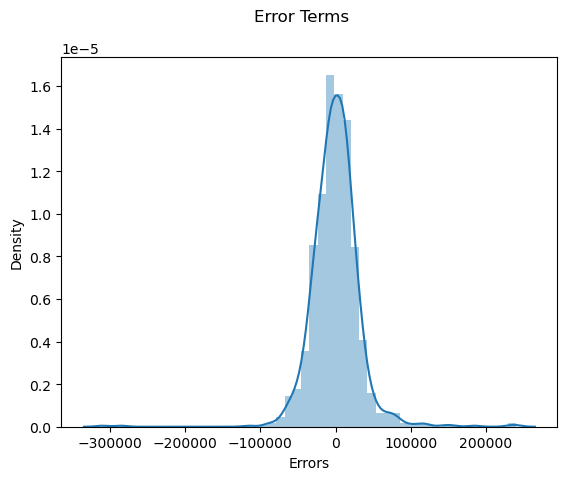

In [76]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred)
fig.suptitle('Error Terms') 
plt.xlabel('Errors')

### R-squared for Train Dataset

In [77]:
r2_score(y_train,y_train_pred)

0.8259850872569535

### Actual Vs Predicted

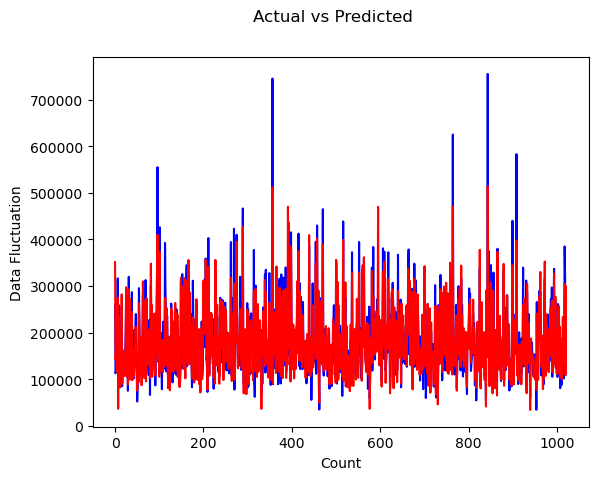

In [78]:
n = [i for i in range(0,len(X_train),1)]
plt.plot(n,y_train, color="blue")
plt.plot(n,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Count')
plt.ylabel('Data Fluctuation')
plt.show()

Text(0, 0.5, 'y_train_pred')

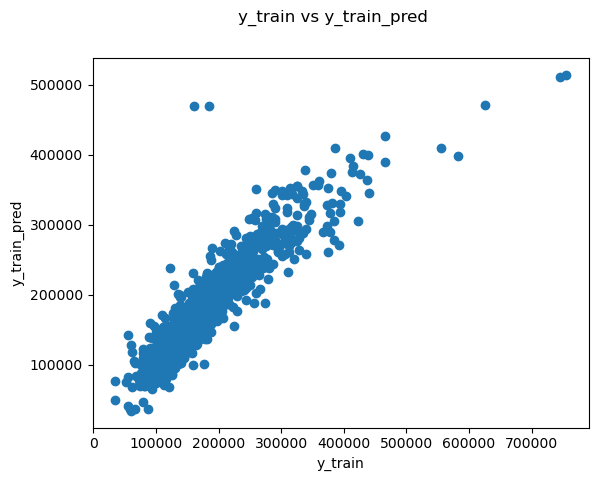

In [79]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred')          
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

## Residial Analysis

In [80]:
y_res = (y_train - y_train_pred)

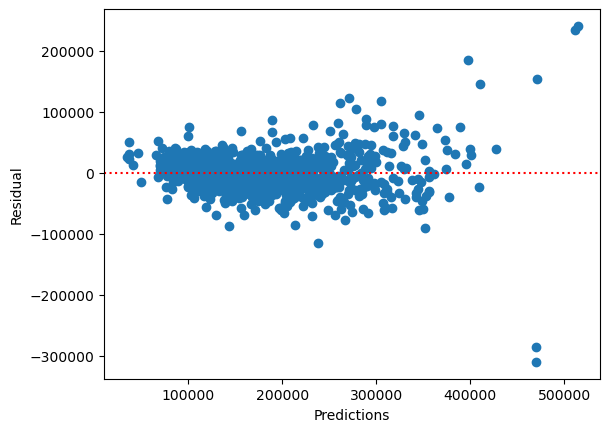

In [81]:
plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

#### Scale Test data 

In [82]:
Test_dataset[numeric_vars] = scaler.transform(Test_dataset[numeric_vars])

In [83]:
Test_dataset.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,60.0,-0.144614,-1.496155,0.384025,-0.679020,0.0,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,1,0,0,0,1,0
57,89.0,0.112107,0.648310,-0.532073,0.923321,0.0,1.051361,0.577925,-0.653302,-1.226909,...,0,0,0,0,1,0,0,0,1,0
780,63.0,-0.253806,0.648310,-0.532073,0.534875,38.0,-0.699764,0.577925,-0.653302,-1.226909,...,0,0,0,0,1,0,0,0,1,0
382,79.0,-0.120835,0.648310,-0.532073,1.020432,0.0,1.051361,0.577925,1.236276,-1.226909,...,0,0,0,0,1,0,0,0,1,0
1170,76.0,-0.059203,-0.066511,0.384025,-0.387685,0.0,-0.699764,-0.533302,1.236276,0.665348,...,0,0,0,0,1,0,0,0,1,0


In [84]:
y_test = Test_dataset.pop('SalePrice')

In [85]:
X_test = Test_dataset

In [86]:
#X_Rfe = X_Rfe.drop(['const'], axis=1)

In [87]:
X_new = X_Rfe

In [88]:
X_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng'],
      dtype='object')

In [89]:
X_new = X_new.drop(['const'], axis=1)

In [90]:
X_test_new = X_test[X_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [91]:
test_lm = sm.OLS(y_test,X_test_new).fit()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          7.15e-153
Time:                        20:20:03   Log-Likelihood:                -5171.8
No. Observations:                 439   AIC:                         1.039e+04
Df Residuals:                     416   BIC:                         1.048e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.583e+05   4630.700     34.190      0.000    1.49e+05    1.67e+05
OverallQual           3.024e+04   2527.222     11.966      0.000    2.53e+04    3.52e+04
BsmtExposure          1.073e+04   1785.975      6.008      0.000    7218.637    1.42e+04
GrLivArea             3.665e+04   2623.018     13.974      0.000    3.15e+04    4.18e+04
MSSubClass_90        -2.117e+04   1.05e+04     -2.010      0.045   -4.19e+04    -463.382
MSSubClass_120       -2.347e+04   7829.786     -2.998      0.003   -3.89e+04   -8080.493
MSSubClass_160       -2.282e+04   8851.935     -2.577      0.010   -4.02e+04   -5415.302
MSSubClass_190        2824.6024   1.55e+04      0.182      0.856   -2.77e+04    3.33e+04
MSZoning_RL           1.151e+04   4726.584      2.434      0.015    2214.680    2.08e+04
LotShape_IR3         -1435.8175   3.28e+04     -0.044      0.965   -6.59e+04    6.31e+04
Neighborhood_Crawfor  1.386e+04   8049.157      1.722      0.086   -1960.660    2.97e+04
Neighborhood_Edwards -7654.4888   7157.881     -1.069      0.286   -2.17e+04    6415.636
Neighborhood_NoRidge  4.754e+04   1.38e+04      3.438      0.001    2.04e+04    7.47e+04
Neighborhood_NridgHt  7.592e+04   8851.814      8.577      0.000    5.85e+04    9.33e+04
Neighborhood_Somerst  2.292e+04   7727.468      2.966      0.003    7727.404    3.81e+04
Neighborhood_StoneBr  8.466e+04   1.05e+04      8.055      0.000     6.4e+04    1.05e+05
Neighborhood_Veenker  4.783e-12   8.61e-12      0.555      0.579   -1.22e-11    2.17e-11
HouseStyle_1Story     1.849e+04   3896.099      4.745      0.000    1.08e+04    2.61e+04
HouseStyle_2.5Fin    -2.719e+04   1.73e+04     -1.572      0.117   -6.12e+04    6806.498
HouseStyle_2.5Unf    -4.982e+04   2.05e+04     -2.432      0.015   -9.01e+04   -9558.890
Exterior1st_BrkFace   5316.7238   7716.170      0.689      0.491   -9850.820    2.05e+04
Exterior2nd_CmentBd    1.84e+04   7491.616      2.456      0.014    3670.033    3.31e+04
Exterior2nd_Stucco   -2725.6534   1.38e+04     -0.197      0.844   -2.99e+04    2.45e+04
Exterior2nd_Wd Shng   2.634e+04    1.4e+04      1.885      0.060   -1125.476    5.38e+04
==============================================================================
Omnibus:                       75.811   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.025
Skew:                           0.432   Prob(JB):                    2.11e-138
Kurtosis:                       8.824   Cond. No.                     1.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.46e-32. This might indicate that there are
strong multicollinearity probl

In [92]:
y_pred = lm.predict(X_test_new)

### R-squared for Test dataset

In [93]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.811662839483452


In [94]:
vif = pd.DataFrame()
vif['Features'] = X_Rfe.columns
vif['VIF'] = [variance_inflation_factor(X_Rfe.values, i) for i in range(X_Rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,8.094
1,OverallQual,2.620
3,GrLivArea,2.396
8,MSZoning_RL,1.505
17,HouseStyle_1Story,1.502
14,Neighborhood_Somerst,1.387
13,Neighborhood_NridgHt,1.359
5,MSSubClass_120,1.323
6,MSSubClass_160,1.292
12,Neighborhood_NoRidge,1.242


# Conclusions

- **The R-squared for Train dataset is 0.82.
- **The R-squared for Test dataset is 0.81.

### There is no major difference between Train and Test dataset.

**The columns that can be used for building a better model are listed below**

In [95]:
X_Rfe.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng'],
      dtype='object')

In [96]:
X_new.columns

Index(['OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng'],
      dtype='object')

# Ridge Regression

**Take an alpha for Ridge Regression**

In [97]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_Rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Pickup the best alpha for the Ridge Regression

In [98]:
print(model_cv.best_params_)

{'alpha': 8.0}


**The best alpha for the model is 8.0**

In [99]:
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_Rfe, y_train)
print(ridge.coef_)

[     0.          29522.67649749  13661.63988348  33134.59386723
 -20881.45815413 -12534.00180255 -15570.47988023 -14644.80549537
  14359.11092206 -12743.08858412  17382.3339801  -14623.06406848
  47705.38951545  46321.2072912   30033.415193    15685.20016347
  14982.00627356  19544.21804554 -12435.85341126 -13065.28538572
  10475.48944565   9781.66755617 -19288.0762315  -15414.42032609]


In [100]:
y_pred_train = ridge.predict(X_Rfe)
y_pred_test = ridge.predict(X_test_new)

print("The R-Squared of Train data in Ridge Regression is")

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

print("\n\n","The R-Squared of test data in Ridge Regression is",)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


print("\n\n","The RSS of train data in Ridge Regression is")

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)


print("\n\n","The RSS of test data in Ridge Regression is")

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)


print("\n\n","The MSE of train data in Ridge Regression is")

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)


print("\n\n","The MSE of test data in Ridge Regression is")

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

The R-Squared of Train data in Ridge Regression is
0.8216081547613632


 The R-Squared of test data in Ridge Regression is
0.8066050348218375


 The RSS of train data in Ridge Regression is
1138471157658.2783


 The RSS of test data in Ridge Regression is
546481015090.33154


 The MSE of train data in Ridge Regression is
1115055002.6036026


 The MSE of test data in Ridge Regression is
1244831469.4540582


**The coefficients for the model using Ridge Regression are  
 29522.67649749 , 13661.63988348 , 33134.59386723 , -20881.45815413 ,
 -12534.00180255 , -15570.47988023 , -14644.80549537 ,  14359.11092206 ,
 -12743.08858412 , 17382.3339801 , -14623.06406848 , 47705.38951545
  46321.2072912 ,  30033.415193  ,  15685.20016347 , 14982.00627356 ,
  19544.21804554 , -12435.85341126 , -13065.28538572 ,  10475.48944565 ,
   9781.66755617 , -19288.0762315 ,  -15414.42032609**

# Lasso Regression

In [101]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_Rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
print(model_cv.best_params_)

{'alpha': 9.0}


In [103]:
alpha = 9

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_Rfe, y_train)

print(lasso.coef_)

[     0.          26736.66737152  13704.81718191  33609.4383572
 -26080.5055929  -17930.64319105 -21737.72137924 -19398.65265845
  12939.97934651 -20590.12218963  26084.75594674 -15416.49822391
  62429.85640215  59695.12449723  38475.95748177  33472.6312603
  28692.39326561  19576.57568278 -37579.37194718 -24122.41012826
  12941.31104653  10760.1210356  -27628.18863554 -19794.48687534]


In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_Rfe)
y_pred_test = lasso.predict(X_test_new)

print("The R-Squared of Train data in Lasso Regression is")

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

print("\n\n","The R-Squared of test data in Lasso Regression is",)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


print("\n\n","The RSS of train data in Lasso Regression is")

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)


print("\n\n","The RSS of test data in Lasso Regression is")

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)


print("\n\n","The MSE of train data in Lasso Regression is")

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)


print("\n\n","The MSE of test data in Lasso Regression is")

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)

The R-Squared of Train data in Lasso Regression is
0.8259686880739985


 The R-Squared of test data in Lasso Regression is
0.811602902937778


 The RSS of train data in Lasso Regression is
1110642859779.5137


 The RSS of test data in Lasso Regression is
532358413507.75836


 The MSE of train data in Lasso Regression is
1087799079.1180348


 The MSE of test data in Lasso Regression is
1212661534.1862378


**The coefficients for the model Lasso Regression are 
 26736.66737152 , 13704.81718191 , 33609.4383572 , -26080.5055929
, -17930.64319105 , -21737.72137924 , -19398.65265845 , 12939.97934651 ,
 -20590.12218963 , 26084.75594674 , -15416.49822391 , 62429.85640215 ,
  59695.12449723 , 38475.95748177 , 33472.6312603 , 28692.39326561 ,
  19576.57568278 , -37579.37194718 , -24122.41012826 , 12941.31104653 ,
  10760.1210356 , -27628.18863554 , -19794.48687534**

# Regularization

In [105]:
betas = pd.DataFrame(index=X_Rfe.columns)
betas.rows = X_Rfe.columns
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

## Co-efficients for model in different Regressions

In [106]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
const,157257.085967,0.000000,0.000000
OverallQual,26605.285774,29522.676497,26736.667372
BsmtExposure,13704.158258,13661.639883,13704.817182
GrLivArea,33683.086824,33134.593867,33609.438357
MSSubClass_90,-26430.365870,-20881.458154,-26080.505593
MSSubClass_120,-18337.414221,-12534.001803,-17930.643191
MSSubClass_160,-22140.020233,-15570.479880,-21737.721379
MSSubClass_190,-19775.089773,-14644.805495,-19398.652658
MSZoning_RL,12823.495359,14359.110922,12939.979347
LotShape_IR3,-21589.836686,-12743.088584,-20590.122190


### Doubling the alpha  for Ridge regression.

In [107]:
alpha = 16
ridge = Ridge(alpha=alpha)

ridge.fit(X_Rfe, y_train)
print(ridge.coef_)

print("\n\n")

y_pred_train = ridge.predict(X_Rfe)
y_pred_test = ridge.predict(X_test_new)

print("The R-Squared of Train data in Ridge Regression is")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

print("\n\n")

print("The R-Squared of Test data in Ridge Regression is")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[     0.          31055.96205422  13572.78823563  32935.90370644
 -17491.46334432  -9720.75579802 -12326.47580455 -11614.15362887
  14514.59558305  -9142.52818301  13011.86201572 -13620.59785084
  38606.56194221  38381.83718435  24640.51865826   9365.01678741
   9875.38788495  19246.80377545  -7304.56676071  -9144.42778764
   8548.37531611   8583.92321455 -14931.08280702 -12643.75869581]



The R-Squared of Train data in Ridge Regression is
0.8161278870544157



The R-Squared of Test data in Ridge Regression is
0.8024924958343721


### Doubling the alpha  for Lasso regression.

In [108]:
alpha = 18

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_Rfe, y_train)

print(lasso.coef_)

print("\n\n")

y_pred_train = lasso.predict(X_Rfe)
y_pred_test = lasso.predict(X_test_new)

print("The R-Squared of Train data in Lasso Regression is")

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)


print("\n\n")

print("The R-Squared of test data in Lasso Regression is")

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[     0.          26866.17009791  13705.823087    33538.89986067
 -25733.74862666 -17522.33208045 -21333.1775645  -19024.78689063
  13055.32453257 -19593.85626732  25563.27008957 -15325.92246752
  62117.53203875  59231.49612182  38174.73271686  32355.92773235
  27724.51154882  19562.29017356 -34936.5161603  -22916.01055622
  12673.37328042  10557.96242087 -27030.86314295 -19471.03059974]



The R-Squared of Train data in Lasso Regression is
0.8259195454767717



The R-Squared of test data in Lasso Regression is
0.811496578459836


In [109]:
X_new.columns

Index(['OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng'],
      dtype='object')

**The Columns for model prediction are 'OverallQual', 'BsmtExposure', 'GrLivArea', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Exterior1st_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng' this columns are used for building a model with R-Squared is 0.8259850872569535.**

In [110]:
e= X_new.corr()
print(e)

                      OverallQual  BsmtExposure  GrLivArea  MSSubClass_90  \
OverallQual              1.000000      0.276697   0.579083      -0.179460   
BsmtExposure             0.276697      1.000000   0.119152       0.013782   
GrLivArea                0.579083      0.119152   1.000000       0.027819   
MSSubClass_90           -0.179460      0.013782   0.027819       1.000000   
MSSubClass_120           0.201752      0.114261  -0.078271      -0.054451   
MSSubClass_160           0.029432     -0.132980  -0.066628      -0.044989   
MSSubClass_190          -0.128317      0.022231   0.033847      -0.032815   
MSZoning_RL              0.113216      0.140749   0.136657       0.012120   
LotShape_IR3             0.038668      0.067087   0.098430      -0.019533   
Neighborhood_Crawfor     0.048308     -0.016609   0.104592      -0.008954   
Neighborhood_Edwards    -0.229580     -0.030151  -0.077041       0.072779   
Neighborhood_NoRidge     0.256823      0.039661   0.360119      -0.039024   

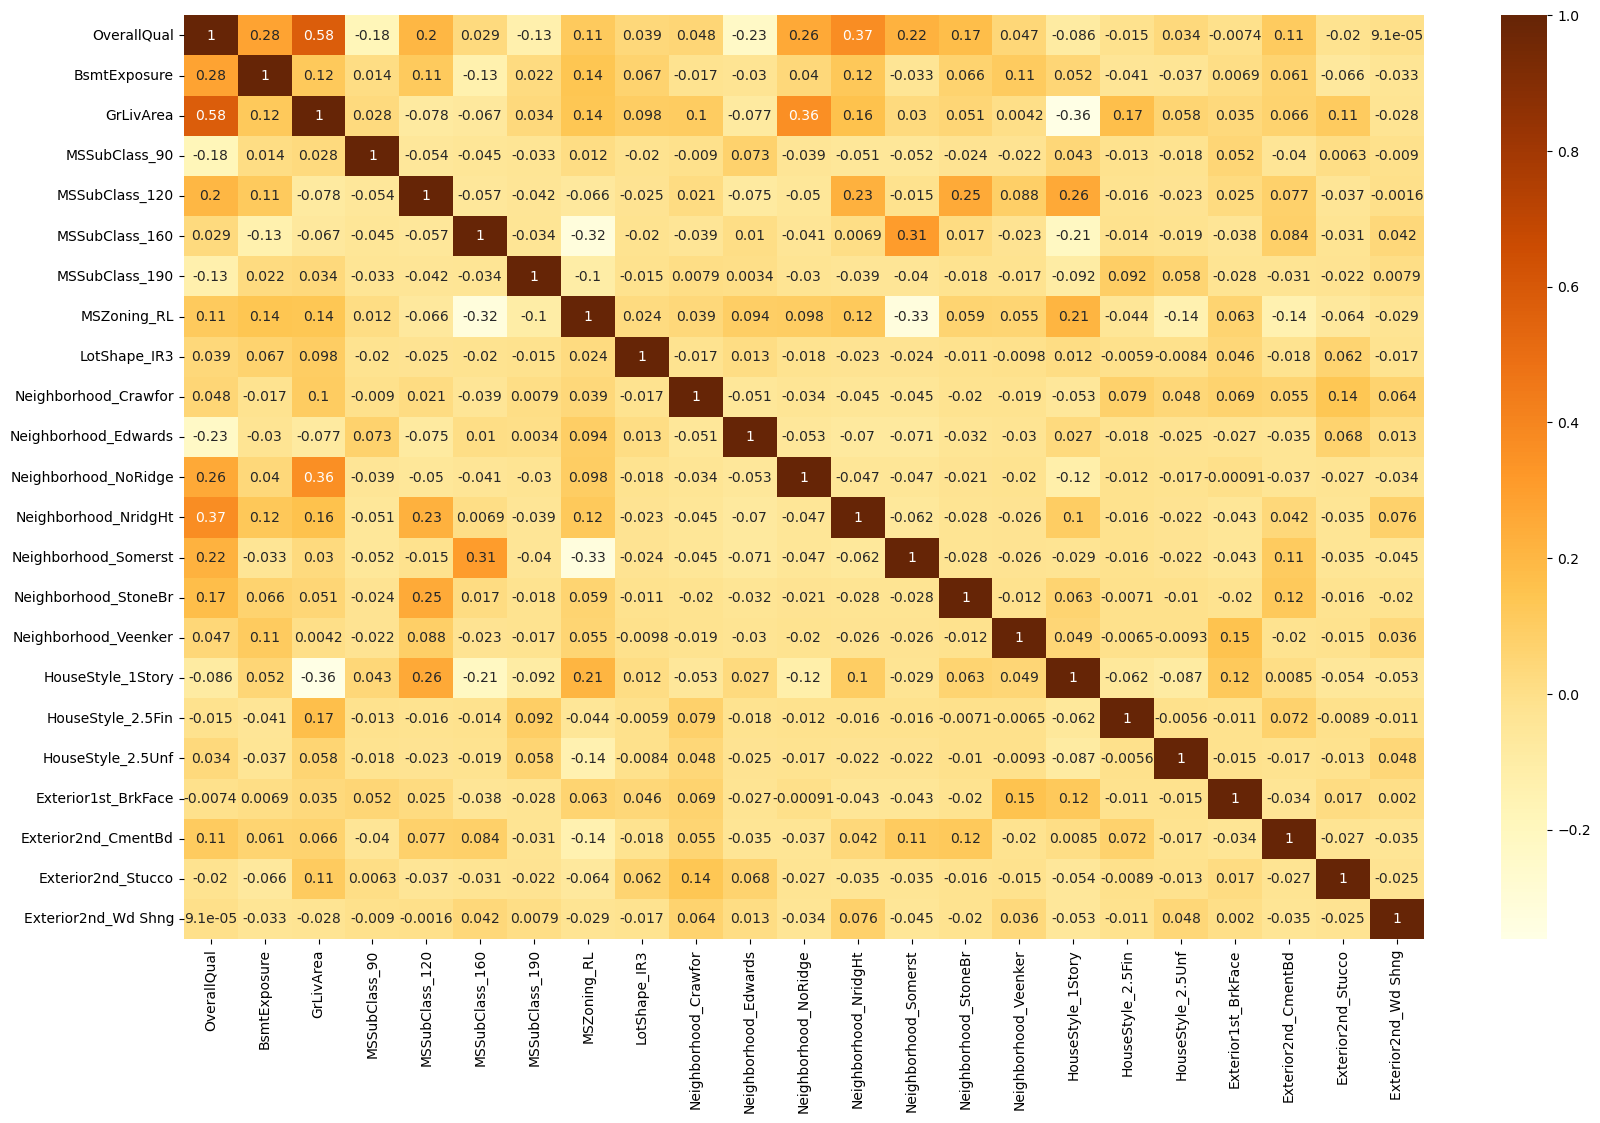

In [111]:
e= X_new.corr()
plt.figure(figsize=[20,12])
sns.heatmap(e,cmap = 'YlOrBr',annot=True)
plt.show()

# End